# Exercise 1 - Data storytelling

## 1. Makeover

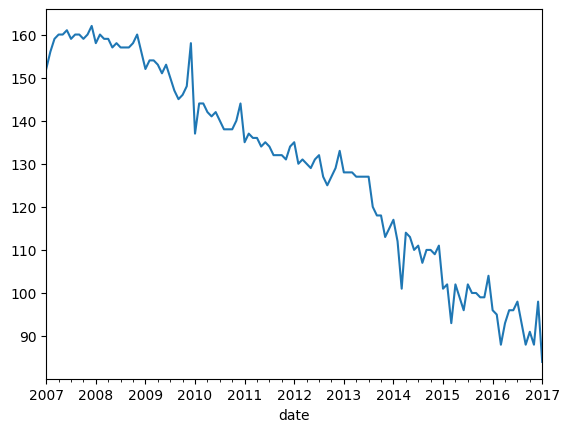

In [53]:
import pandas as pd
import duckdb

df = pd.read_csv("data/norway_new_car_sales_by_month.csv")
df = duckdb.query(
    """
    SELECT avg_CO2, import,quantity, year, month
    FROM df

"""
).df()

df["date"] = pd.to_datetime(
    df["Year"].astype(str) + "-" + df["Month"].astype(str).str.zfill(2), format="%Y-%m"
)

df = df.set_index("date")

ax = df["Avg_CO2"].plot()

## data storytelling makeover
- Remove clutter: such as top spine and right spine
- Left align the xlabel, top align the ylabel and left align the title
- Use contrast to focus the attention to what you want the audience to see
- Descriptive title
- Annotate and change line style

In [54]:
import pandas as pd
import duckdb

df = pd.read_csv("data/norway_new_car_sales_by_month.csv")
df = duckdb.query(
    """
    SELECT avg_CO2, import,quantity, year, month
    FROM df

"""
).df()

df["date"] = pd.to_datetime(
    df["Year"].astype(str) + "-" + df["Month"].astype(str).str.zfill(2), format="%Y-%m"
)

df = df.set_index("date")

In [55]:
df.head()

,Avg_CO2,Import,Quantity,Year,Month
date,,,,,
2007-01-01,152,2276,12685,2007,1
2007-02-01,156,1992,9793,2007,2
2007-03-01,159,2626,11264,2007,3
2007-04-01,160,2220,8854,2007,4
2007-05-01,160,2881,12007,2007,5


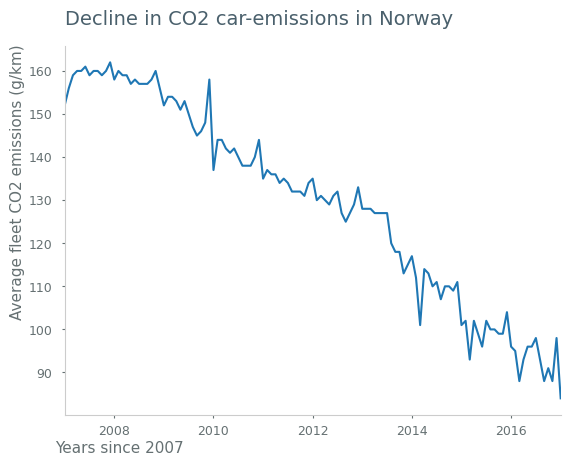

In [56]:
from constants import GRAY_1, GRAY_2,GRAY_3,BLUE_1
# Remove clutter: such as top spine and right spine

ax = df["Avg_CO2"].plot()

# remove clutter: top spine and right spine. 
ax.spines[['top', 'right']].set_visible(False)

#  left align the title
ax.set_title( 
    "Decline in CO2 car-emissions in Norway", 
    loc="left",
    fontsize=14,
    color = GRAY_3, 
    pad=15
)

# Left align the xlabel
ax.set_xlabel("Years since 2007", color=GRAY_2, fontsize=11) # possible add on:  fontweight= "bold"
ax.xaxis.set_label_coords(0.11, -0.07)

# top align the ylabel
ax.set_ylabel("Average fleet CO2 emissions (g/km)", color=GRAY_2, fontsize=11, rotation=90)
ax.yaxis.set_label_coords(-0.08, 0.63)

# contrast
ax.spines[['bottom', 'left']].set_color(GRAY_1)

ax.tick_params(
    axis="both", 
    colors = GRAY_2, 
    labelsize = 9, 
    length = 2,
    pad = 5
    )
ax.tick_params(axis= "y", pad = 7)

# remove clutter, fewer ticks
xticks_to_show = ax.get_xticks()[1::2]  # show every 2nd tick
ax.set_xticks(xticks_to_show)

# remove minor ticks
ax.minorticks_off()   

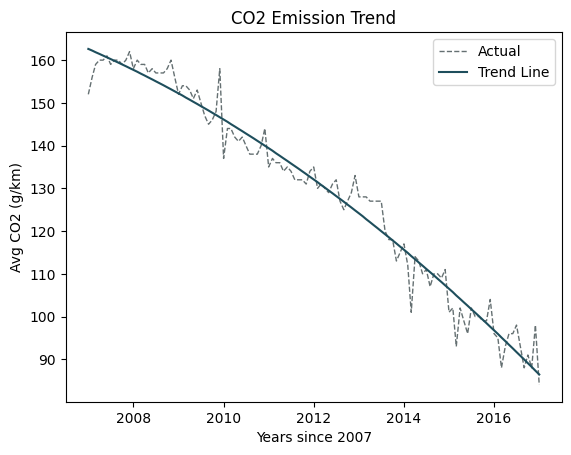

In [57]:
import numpy as np
import matplotlib.pyplot as plt

# Index represents years or a time series
x = np.arange(len(df))  
y = df["Avg_CO2"].values

# Fit a linear trend line
coeffs = np.polyfit(x, y, deg=2)
trend = np.polyval(coeffs, x)

# Plot
fig, ax = plt.subplots()

# Plot the original data
ax.plot(df.index, y, label="Actual", color=GRAY_2, linestyle="--", linewidth = 1)

# Plot the trend line
ax.plot(df.index, trend, label="Trend Line", color=BLUE_1)

# Optional: customize
ax.set_title("CO2 Emission Trend")
ax.set_xlabel("Years since 2007")
ax.set_ylabel("Avg CO2 (g/km)")
ax.legend()

### COMBINED

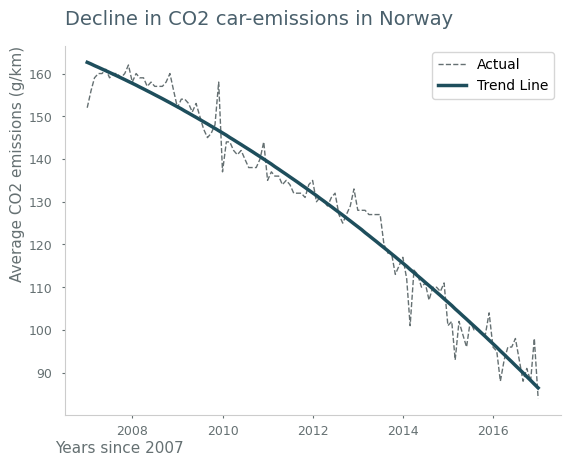

In [58]:
import numpy as np
import matplotlib.pyplot as plt

# Index represents years or a time series
x = np.arange(len(df))  
y = df["Avg_CO2"].values

# Fit a linear trend line
coeffs = np.polyfit(x, y, deg=2)
trend = np.polyval(coeffs, x)

# Plot
fig, ax = plt.subplots()

# Plot the original data
ax.plot(df.index, y, label="Actual", color=GRAY_2, linestyle="--", linewidth = 1)

# Plot the trend line
ax.plot(df.index, trend, label="Trend Line", color=BLUE_1, linewidth = 2.5)

# remove clutter: top spine and right spine. 
ax.spines[['top', 'right']].set_visible(False)

#  left align the title
ax.set_title( 
    "Decline in CO2 car-emissions in Norway", 
    loc="left",
    fontsize=14,
    color = GRAY_3, 
    pad=15
)

# Left align the xlabel
ax.set_xlabel("Years since 2007", color=GRAY_2, fontsize=11) # possible add on:  fontweight= "bold"
ax.xaxis.set_label_coords(0.11, -0.07)

# top align the ylabel
ax.set_ylabel("Average CO2 emissions (g/km)", color=GRAY_2, fontsize=11, rotation=90)
ax.yaxis.set_label_coords(-0.08, 0.68)

# contrast
ax.spines[['bottom', 'left']].set_color(GRAY_1)

ax.tick_params(
    axis="both", 
    colors = GRAY_2, 
    labelsize = 9, 
    length = 2,
    pad = 5
    )
ax.tick_params(axis= "y", pad = 7)

# remove minor ticks
ax.minorticks_off()  

ax.legend()

In [ ]:
# remove clutter, fewer ticks
#xticks_to_show = ax.get_xticks()[1::2]  # show every 2nd tick
#ax.set_xticks(xticks_to_show)

